In [112]:
# import statements
import os
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from matplotlib import transforms
import scipy.ndimage as snd
from scipy import ndimage, misc
import skimage
import skimage.transform

# Note that there was a dead pixel at (630, 309) on our CCD, both observing times
# Therefore any line thats like var[308][628] = var[309][629] is me accounting for the
# pixel that is currently ruining my life by setting it equal to just a random pixel nearby


## Lab 7

In [113]:
# Biases
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')
    # I know I have an inefficient way of keeping files

biases = glob.glob('**/bias_0s_*.FIT')
biases

['bias\\bias_0s_001.FIT',
 'bias\\bias_0s_002.FIT',
 'bias\\bias_0s_003.FIT',
 'bias\\bias_0s_004.FIT',
 'bias\\bias_0s_005.FIT',
 'bias\\bias_0s_006.FIT',
 'bias\\bias_0s_007.FIT',
 'bias\\bias_0s_008.FIT',
 'bias\\bias_0s_009.FIT',
 'bias\\bias_0s_010.FIT']

In [114]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
mean_bias[308][628] = mean_bias[309][629]

stddev_bias = np.std(bias_timestream, axis=0)
stddev_bias[308][628] = stddev_bias[309][629]

readnoise = np.mean(stddev_bias)

del bias_timestream

In [115]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

4.923827366324085

In [116]:
# Darks
    # darks for .04s, .1s, .5s, 1s, 3s, 45s, 50s

darks_40ms = glob.glob("**/dark_0d4*.FIT")
darks_100ms = glob.glob("**/dark_0d1s_*.FIT")
darks_500ms = glob.glob("**/dark_0d5s_*.FIT")
darks_1s = glob.glob("**/dark_10*.FIT")
darks_3s = glob.glob("**/dark_3s_*.FIT")
darks_45s = glob.glob("**/dark_45*.FIT")
darks_50s = glob.glob("**/dark_50s_*FIT")

darks_40ms

['darks\\dark_0d4001.FIT',
 'darks\\dark_0d4002.FIT',
 'darks\\dark_0d4003.FIT',
 'darks\\dark_0d4004.FIT',
 'darks\\dark_0d4005.FIT',
 'darks\\dark_0d4006.FIT',
 'darks\\dark_0d4007.FIT',
 'darks\\dark_0d4008.FIT',
 'darks\\dark_0d4009.FIT',
 'darks\\dark_0d4010.FIT',
 'darks\\dark_0d4_.FIT']

In [117]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')

darks_40ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_40ms]
average_40ms_dark = np.mean(darks_40ms, axis=0)
average_40ms_dark[308][628] = average_40ms_dark[309][629]
stddev_40ms_dark = np.std(darks_40ms, axis=0)

darks_100ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_100ms]
average_100ms_dark = np.mean(darks_100ms, axis=0)
average_100ms_dark[308][628] = average_100ms_dark[309][629]
stddev_100ms_dark = np.std(darks_100ms, axis=0)

darks_500ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_500ms]
average_500ms_dark = np.mean(darks_500ms, axis=0)
average_500ms_dark[308][628] = average_500ms_dark[309][629]
stddev_500ms_dark = np.std(darks_500ms, axis=0)

darks_1s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_1s]
average_1s_dark = np.mean(darks_1s, axis=0)
average_1s_dark[308][628] = average_1s_dark[309][629]
stddev_1s_dark = np.std(darks_1s, axis=0)

darks_3s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_3s]
average_3s_dark = np.mean(darks_3s, axis=0)
average_3s_dark[308][628] = average_3s_dark[309][629]
stddev_3s_dark = np.std(darks_3s, axis=0)

darks_45s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_45s]
average_45s_dark = np.mean(darks_45s, axis=0)
average_45s_dark[308][628] = average_45s_dark[309][629]
stddev_45s_dark = np.std(darks_45s, axis=0)

darks_50s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_50s]
average_50s_dark = np.mean(darks_50s, axis=0)
average_50s_dark[308][628] = average_50s_dark[309][629]
stddev_50s_dark = np.std(darks_50s, axis=0)

In [118]:
uncertainty_on_40ms_mean_dark = stddev_40ms_dark / np.sqrt(len(darks_40ms))
uncertainty_on_100ms_mean_dark = stddev_100ms_dark / np.sqrt(len(darks_100ms))
uncertainty_on_500ms_mean_dark = stddev_500ms_dark / np.sqrt(len(darks_500ms))
uncertainty_on_1s_mean_dark = stddev_1s_dark / np.sqrt(len(darks_1s))
uncertainty_on_3s_mean_dark = stddev_3s_dark / np.sqrt(len(darks_3s))
uncertainty_on_45s_mean_dark = stddev_45s_dark / np.sqrt(len(darks_45s))
uncertainty_on_50s_mean_dark = stddev_50s_dark / np.sqrt(len(darks_50s))

del darks_40ms
del darks_100ms
del darks_500ms
del darks_1s
del darks_3s
del darks_45s
del darks_50s

# TEST BEGIN


In [119]:
# M42
    # Just copy-pasted from hpers and changed to m42 basically

os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')

B_flat_m42 = glob.glob("**/flat_b_1s*.FIT")
I_flat_m42 = glob.glob("**/flat_i_1s*.FIT")
V_flat_m42 = glob.glob("**/flat_v_1s*.FIT")

B_quad1_m42 = glob.glob("**/m42_45s_q1_b_*.FIT")
B_quad2_m42 = glob.glob("**/m42_45s_q2_b_*.FIT")
B_quad3_m42 = glob.glob("**/m42_45s_q3_b_*.FIT")
B_quad4_m42 = glob.glob("**/m42_45s_q4_b_*.FIT")

I_quad1_m42 = glob.glob("**/m42_45s_q1_i_*.FIT")
I_quad2_m42 = glob.glob("**/m42_45s_q2_i_*.FIT")
I_quad3_m42 = glob.glob("**/m42_45s_q3_i_*.FIT")
I_quad4_m42 = glob.glob("**/m42_45s_q4_i_*.FIT")

V_quad1_m42 = glob.glob("**/m42_45s_q1_v_*.FIT")
V_quad2_m42 = glob.glob("**/m42_45s_q2_v_**.FIT")
V_quad3_m42 = glob.glob("**/m42_45s_q3_v_*.FIT")
V_quad4_m42 = glob.glob("**/m42_45s_q4_v_*.FIT")

In [120]:
B_flat_m42_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_flat_m42]
mean_B_flat_m42 = np.mean(B_flat_m42_timestream, axis=0)
del B_flat_m42_timestream

mean_B_flat_m42[308][628] = mean_B_flat_m42[309][629]

bias_subtracted_B_flat_m42 = mean_B_flat_m42 - mean_bias
B_gain = fits.getheader('flat\\flat_b_1s001.FIT')['EGAIN']
flat_poisson_uncertainty_m42 = (bias_subtracted_B_flat_m42)**0.5
flat_singleframe_uncertainty_m42 = (flat_poisson_uncertainty_m42**2 + readnoise**2)**0.5
flat_total_uncertainty_m42_B = ((flat_singleframe_uncertainty_m42/np.sqrt(len(B_flat_m42)))**2 + mean_bias_noise**2)**0.5
mean_of_flat_m42 = np.mean(bias_subtracted_B_flat_m42)
normalized_mean_B_flat_m42 = bias_subtracted_B_flat_m42 / mean_of_flat_m42
np.mean(normalized_mean_B_flat_m42)

V_flat_m42_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in V_flat_m42]
mean_V_flat_m42 = np.mean(V_flat_m42_timestream, axis=0)
del V_flat_m42_timestream

mean_V_flat_m42[308][628] = mean_V_flat_m42[309][629]

bias_subtracted_V_flat_m42 = mean_V_flat_m42 - mean_bias
V_gain = fits.getheader('flat\\flat_v_1s001.FIT')['EGAIN']
flat_poisson_uncertainty_m42 = (bias_subtracted_V_flat_m42)**0.5
flat_singleframe_uncertainty_m42 = (flat_poisson_uncertainty_m42**2 + readnoise**2)**0.5
flat_total_uncertainty_m42_V = ((flat_singleframe_uncertainty_m42/np.sqrt(len(V_flat_m42)))**2 + mean_bias_noise**2)**0.5
mean_of_flat_m42 = np.mean(bias_subtracted_V_flat_m42)
normalized_mean_V_flat_m42 = bias_subtracted_V_flat_m42 / mean_of_flat_m42
np.mean(normalized_mean_V_flat_m42)

I_flat_m42_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in I_flat_m42]
mean_I_flat_m42 = np.mean(I_flat_m42_timestream, axis=0)
del I_flat_m42_timestream

mean_I_flat_m42[308][628] = mean_I_flat_m42[309][629]

bias_subtracted_I_flat_m42 = mean_I_flat_m42 - mean_bias
I_gain = fits.getheader('flat\\flat_i_1s001.FIT')['EGAIN']
flat_poisson_uncertainty_m42 = (bias_subtracted_I_flat_m42)**0.5
flat_singleframe_uncertainty_m42 = (flat_poisson_uncertainty_m42**2 + readnoise**2)**0.5
flat_total_uncertainty_m42_I = ((flat_singleframe_uncertainty_m42/np.sqrt(len(I_flat_m42)))**2 + mean_bias_noise**2)**0.5
mean_of_flat_m42 = np.mean(bias_subtracted_I_flat_m42)
normalized_mean_I_flat_m42 = bias_subtracted_I_flat_m42 / mean_of_flat_m42
np.mean(normalized_mean_I_flat_m42)

0.9999999999999997

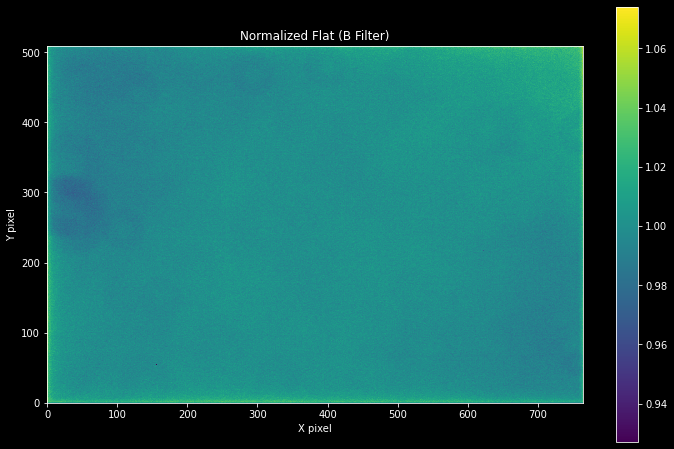

In [121]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_B_flat_m42, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat (B Filter)")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

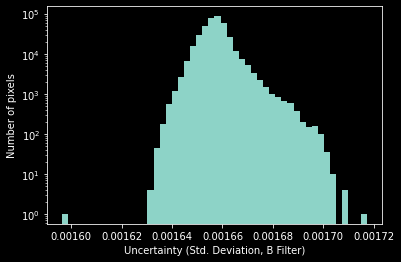

In [122]:
normalized_flat_uncertainty_m42_B = flat_total_uncertainty_m42_B / mean_of_flat_m42
pl.xlabel("Uncertainty (Std. Deviation, B Filter)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_uncertainty_m42_B.ravel(), bins=50, log=True)

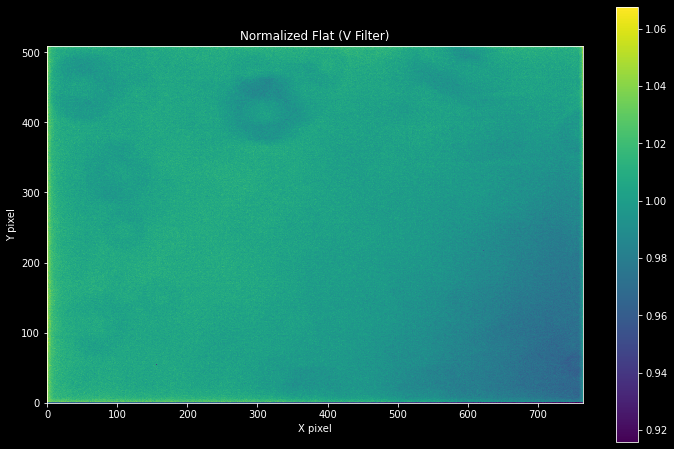

In [123]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_V_flat_m42, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat (V Filter)")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

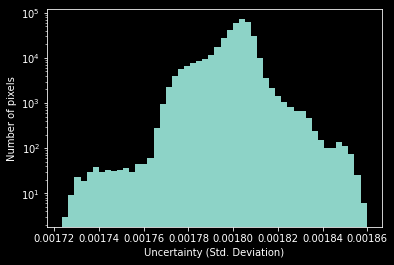

In [124]:
normalized_flat_uncertainty_m42_V = flat_total_uncertainty_m42_V / mean_of_flat_m42
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_uncertainty_m42_V.ravel(), bins=50, log=True)

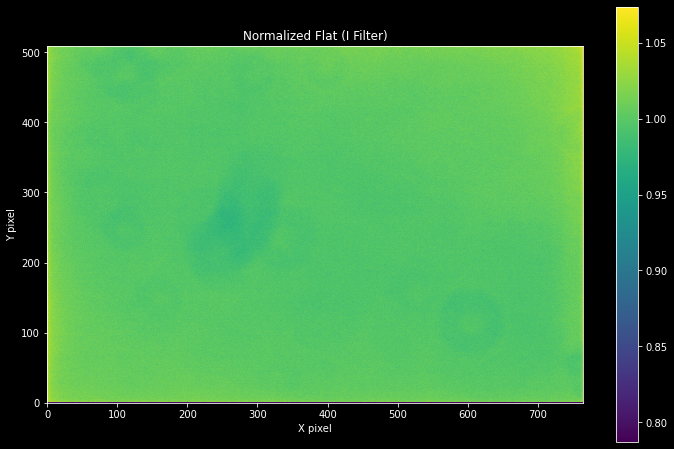

In [125]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_I_flat_m42, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat (I Filter)")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

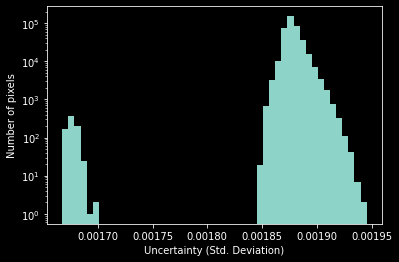

In [126]:
normalized_flat_uncertainty_m42_I = flat_total_uncertainty_m42_I / mean_of_flat_m42
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_uncertainty_m42_I.ravel(), bins=50, log=True)


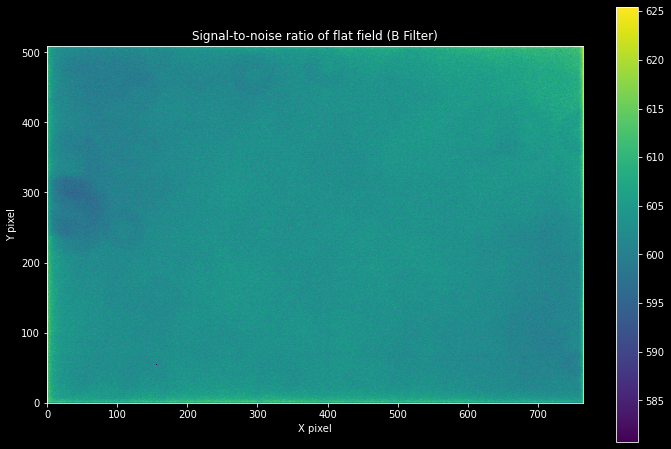

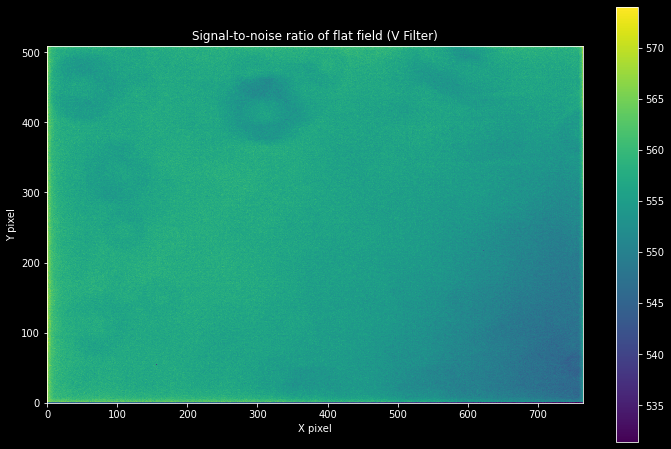

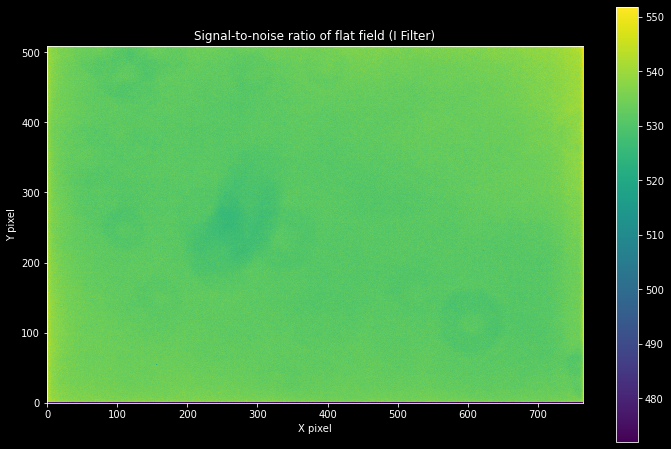

In [127]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field (B Filter)")
pl.imshow(normalized_mean_B_flat_m42 / normalized_flat_uncertainty_m42_B, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field (V Filter)")
pl.imshow(normalized_mean_V_flat_m42 / normalized_flat_uncertainty_m42_V, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field (I Filter)")
pl.imshow(normalized_mean_I_flat_m42 / normalized_flat_uncertainty_m42_I, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [128]:
def shift_image(X, dx, dy):
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = None
    elif dy<0:
        X[dy:, :] = None
    if dx>0:
        X[:, :dx] = None
    elif dx<0:
        X[:, dx:] = None
    return X

# https://stackoverflow.com/questions/27087139/shifting-an-image-in-numpy
# Couldn't for the life of me figure out how to save the pyplot after applying a transformation

<ipython-input-129-078101ba1b03>:96: RuntimeWarning: invalid value encountered in true_divide
  bigim = (np.nan_to_num(bigim1)+np.nan_to_num(bigim2)+np.nan_to_num(bigim3)) / (totalcounts)


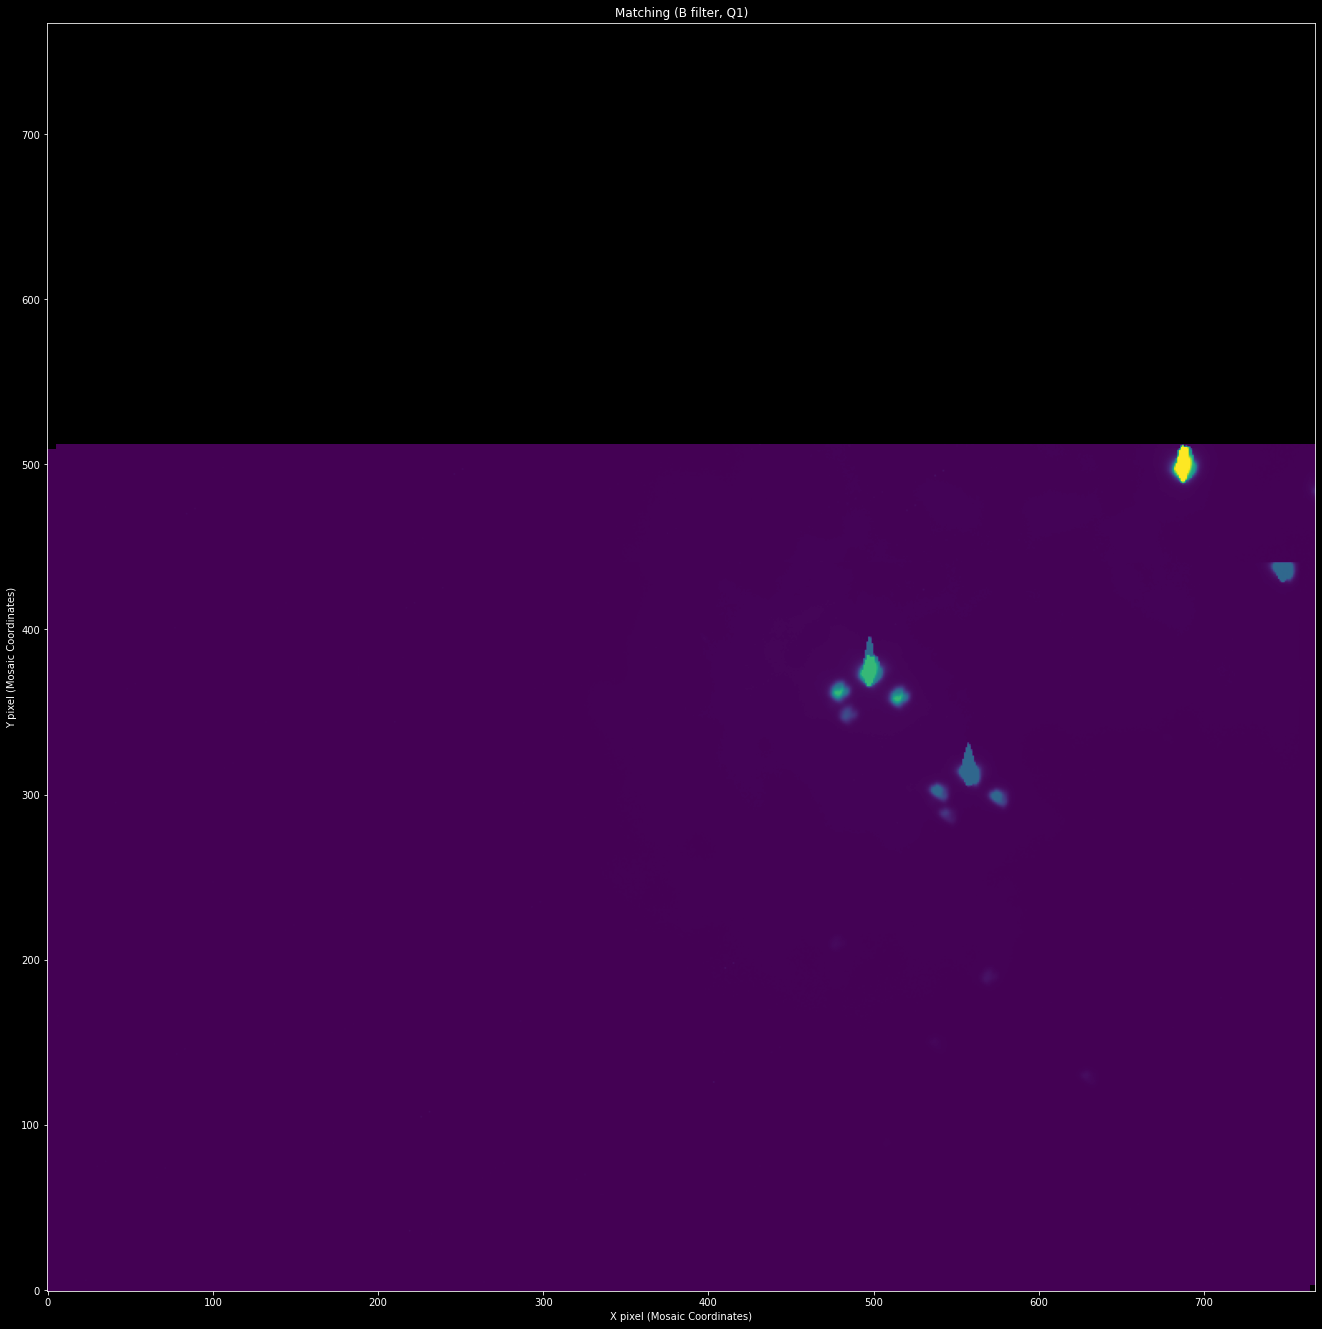

In [129]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')

m42_list = B_quad1_m42, I_quad1_m42, V_quad1_m42, B_quad2_m42, I_quad2_m42, V_quad2_m42, \
             B_quad3_m42, I_quad3_m42, V_quad3_m42, B_quad4_m42, I_quad4_m42, V_quad4_m42

i = 0
# There's a far easier way to do this iteration certainly but I'm just using the first way I can think of

# Both quadrants 3 and 4 have the three stars * tet02 Ori A, * tet02 Ori B, and * tet02 Ori C,
# So those are the ones being used to align the three images to be composite

coords_list =[[[375, 497, 370, 494, 382, 566], [330, 577, 323, 579, 346, 580], [319, 469, 314, 461, 296, 413]],
              # Q1
             [[405, 615, 396, 619, 389, 619], [382, 238, 347, 215, 338, 216], [394, 207, 363, 206, 400, 209]],
             # Q2
             [[118, 295, 87, 256, 84, 217], [86, 300, 116, 323, 78, 300], [54, 306, 22, 271, 31, 271]],
             # Q3
             [[300, 170, 275, 165, 265, 161], [382, 238, 348, 214, 337, 217], [394, 207, 401, 210, 363, 207]]]
             # Q4
quad = 1

for current_file_list in m42_list:
    current_filter = [fits.getheader(x)['FILTER'] for x in current_file_list]
    current_filter = current_filter[0]
        # Determines hat filter is currently being used

    if current_filter.lower() == "photometric b":
        gain = B_gain
        filter_num = 0
        uncertainty = normalized_flat_uncertainty_m42_B
    elif current_filter.lower() == "photometric v":
        gain = V_gain
        filter_num = 1
        uncertainty = normalized_flat_uncertainty_m42_V
    elif current_filter.lower() == "photometric i":
        gain = I_gain
        filter_num = 2
        uncertainty = normalized_flat_uncertainty_m42_I
    else:
        print("Something has gone horribly wrong.")
        # Basically just determines what gain and what uncertainty to use based on the filter name

    if filter_num != 0:
        break

    # if i < 3:
    #     quad = 1
    # elif i < 6:
    #     quad = 2
    # elif i < 9:
    #     quad = 3
    # elif i < 12:
    #     quad = 4
    # else:
    #     print("Something has gone horribly wrong.")
    #     # Determines the current quadrant

    current_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in current_file_list]
    image1 = current_timestream[0]
    image1[308][628] = image1[309][629]
    image2 = current_timestream[1]
    image2[308][628] = image2[309][629]
    image3 = current_timestream[2]
    image3[308][628] = image3[309][629]

    x_1, y_1 = coords_list[quad-1][filter_num][0], coords_list[quad-1][filter_num][1]
    x_2, y_2 = coords_list[quad-1][filter_num][2], coords_list[quad-1][filter_num][3]
    x_3, y_3 = coords_list[quad-1][filter_num][4], coords_list[quad-1][filter_num][5]

    # Differences
    # Diff of star 1 between first and second images
    x_12 = x_1 - x_2
    y_12 = y_1 - y_2

    # Diff of star 1 between first and third images
    x_13 = x_1 - x_3
    y_13 = y_1 - y_3


    bigim1 = np.zeros([768,768])*np.nan
    bigim2 = np.zeros([768,768])*np.nan
    bigim3 = np.zeros([768,768])*np.nan
    bigim1[0:image1.shape[0], 0:image1.shape[1]] = image1
    bigim2[0:image2.shape[0], 0:image2.shape[1]] = image2
    bigim3[0:image3.shape[0], 0:image3.shape[1]] = image3
    bigim2 = shift_image(bigim2, x_12, y_12)
    bigim3 = shift_image(bigim3, x_13, y_13)


    counts1 = np.isfinite(bigim1).astype('int')
    counts2 = np.isfinite(bigim2).astype('int')
    counts3 = np.isfinite(bigim3).astype('int')

    totalcounts = counts1+counts2+counts3

    bigim = (np.nan_to_num(bigim1)+np.nan_to_num(bigim2)+np.nan_to_num(bigim3)) / (totalcounts)
    # then, we set the "blank" pixels to nan again
    # (you can ignore the divide-by-zero errors because we're setting the divided-by-zero pixels to nan anyway)
    bigim[(totalcounts) == 0] = np.nan


    pl.figure(figsize=(50,50))
    bigim[bigim == 0] = np.nan
    im = pl.subplot(1,2,1).imshow(bigim)
    # for display, I'm setting zeros to nan again
    _=pl.title("Matching (" + current_filter[-1] + " filter, Q" + str(quad) + ")")
    _=pl.xlabel("X pixel (Mosaic Coordinates)")
    _=pl.ylabel("Y pixel (Mosaic Coordinates)")


    # pl.figure(figsize=(50,50))
    # _=pl.title("M42 dark-subtracted, flattened image (" + current_filter[-1] + " filter, Q" + quad + ")")
    # im = pl.subplot(1,2,1).imshow(bigim, origin='lower', interpolation='none', vmax=1800*B_gain)
    # _=pl.xlabel("X pixel (Mosaic Coordinates)")
    # _=pl.ylabel("Y pixel (Mosaic Coordinates)")
    # pl.colorbar(im)

    del current_timestream



# Obtains the three images from a quadrant in a certain filter and averages them

In [130]:
# Star names
# Q1 & Q4:
# 1: * tet01 Ori C
# 2: * tet01 Ori B
# 3: * tet01 Ori A
# 4: * tet01 Ori D

# Q3:
# 1: * tet02 Ori A
# 2: * tet02 Ori B
# 3: * tet02 Ori C
# 4: V* V1073 Ori
# 5: V* AK Ori

# Q2:
# 1: HD 36982
# 2: V* KS Ori
# 3: V* LL Ori

# As determined through DS9 using SIMBAD catalog and 2MASS image server
# Also determining the coordinates of each star in each image through DS9
# A bit inefficient, but it's fine
# Also not very accurate by any means but it's better than having visible duplicates in the data :-/

In [131]:
# Stars as shown
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')
fn_q1_q4 = "horseshoe.png"
fn_q2 = "triangle.png"
fn_q3 = "fivestarsq3.png"

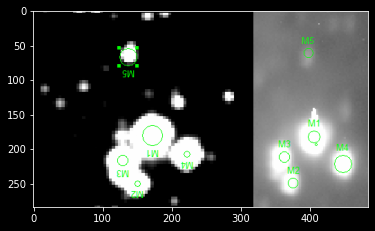

In [132]:
# Finder charts vs FITS images

# Q1 and Q4 finder chart stars ("horseshoe")
im = img.imread(fn_q1_q4)
plt.imshow(im, origin='upper')

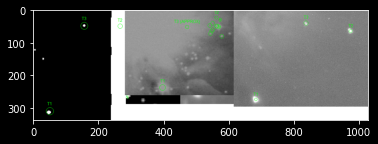

In [133]:
# Q2 finder chart stars ("triangle")
im = img.imread(fn_q2)
plt.imshow(im, origin='upper')

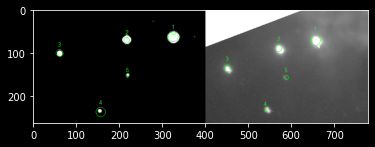

In [134]:
# Q3 finder chart stars (I dunno, an arrow, maybe?)
im = img.imread(fn_q3)
plt.imshow(im, origin='upper')

In [135]:
# COPY/PASTED SIMBAD COORDS OF MATCHED STARS FROM OUR IMAGES
# TRAPEZOID (Q3)
# 1: {083.8454321129830 -05.4160655533618 0.1994 0.2051 90 {* tet02 Ori A} SB* 0.006 1.380 2.2153 0.000063 6.30 6.39 O9.5IVp}
# 2: {083.8600078271642 -05.4168920419063 0.0645 0.0734 90 {* tet02 Ori B} YSO 1.467 0.077 2.4459 0.000095 6.29 6.38 B2-B5}
# 3: {083.8809696497211 -05.4212186958393 0.0397 0.0435 90 {* tet02 Ori C} Orion_V* 2.367 3.524 2.4229 0.000100 7.80 8.24 B4V}
# 4: {083.8684427811187 -05.4389912158238 0.0751 0.0669 90 {V* V1073 Ori} Orion_V* 0.184 0.909 2.5965 0.000080 9.64 9.52 B9.5V}
# 5: {083.8597962569978 -05.4278467998531 0.0581 0.0648 90 {V* AK Ori} Orion_V* 0.124 2.175 2.4376 0.000096 12.859 12.082 G5:}
#
# HORSESHOE (Q1 & Q4)
# 1: {083.8186161063084 -05.3896988630991 0.2664 0.2532 90 {* tet01 Ori C} ** 2.111 -0.588 2.7066 0.000082 5.15 5.13 O7Vp}
# 2: {083.8172302422873 -05.3852220643495 0.0454 0.0492 90 {* tet01 Ori B} EB* 1.459 1.030 2.4824 0.000087 8.20 7.96 B1V}
# 3: {083.8159444718486 -05.3873198195769 0.0657 0.0724 90 {* tet01 Ori A} Ae* 1.536 0.123 2.3731 0.000094 6.75 6.73 B0V}
# 4: {083.8219120301588 -05.3879405613796 0.0456 0.0521 90 {* tet01 Ori D} YSO 1.836 0.165 2.1166 0.000108 6.79 6.70 B1.5Vp}
#
# TRIANGLE (Q2)
# T1: {083.7909916121930 -05.4647868257898 0.0462 0.0452 90 {HD  36982} Orion_V* 1.482 1.610 2.4474 0.000127 8.58 8.46 B1.5Vp}
# T2: {083.7505457414543 -05.4211763792293 0.0434 0.0419 90 {V* KS Ori} Orion_V* 2.936 -2.707 2.6985 0.000067 10.34 10.19 A0V}
# T3: {083.7734900570550 -05.4220933749747 0.0373 0.0342 90 {V* LL Ori} Orion_V* 1.654 -0.334 2.5514 0.000097 12.309 11.517 K0-K3e}